In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("titles.csv")
df = df.iloc[:, :9]

In [40]:
df_show = df[df["type"] == "SHOW"]
df_movie = df[df["type"] == "MOVIE"]

In [150]:
df_show.dropna()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US']
7,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB']
17,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,['comedy'],['GB']
35,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,['comedy'],['US']
47,ts21715,Thomas & Friends,SHOW,Thomas & Friends is a British children's telev...,1984,TV-Y,10,"['animation', 'family', 'fantasy', 'music', 'd...",['GB']
...,...,...,...,...,...,...,...,...,...
6105,ts373133,Karate Sheep,SHOW,Trico is an enthusiastic sheep who loves to sh...,2023,TV-G,10,"['comedy', 'family', 'animation']",['DE']
6108,ts367213,Class,SHOW,Three students from a poor neighborhood join a...,2023,TV-MA,51,"['drama', 'crime', 'thriller']",['IN']
6109,ts367818,Bling Empire: New York,SHOW,"Meet a fresh group of wealthy, sophisticated a...",2023,TV-MA,40,['reality'],['US']
6117,ts313183,Rana Naidu,SHOW,Rana Naidu is the go-to problem solver for the...,2023,TV-MA,48,"['action', 'crime', 'drama']",['IN']


In [51]:

df_movie["release_year"].dropna()
df_movie

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US']
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",['US']
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",['US']
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",['US']
5,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'comedy']",['GB']
...,...,...,...,...,...,...,...,...,...
6132,tm1303784,عبود في البيت,MOVIE,Two young boys must work together to stop robb...,2023,NaN,81,"['family', 'comedy']",['KW']
6133,tm1260999,Sweetie,MOVIE,"‘Theatre is my life,’ Yıldız Kenter admits in ...",2023,NaN,120,['documentation'],['TR']
6134,tm1310286,Sommore: Queen Chandelier,MOVIE,This Queen of Comedy shines as she takes the s...,2023,NaN,69,['comedy'],['US']
6135,tm1072700,All Na Vibes,MOVIE,The lives of three teenagers and a hit-man int...,2023,NaN,80,['drama'],['NG']


In [155]:
df_show_count = pd.DataFrame(df_show.groupby(by="release_year")["title"].count())
df_show_count.rename(columns={"title":"count"}, inplace=True)
df_show_count = df_show_count[7:-1]
df_show_count.shape

(32, 1)

In [154]:
df_movie_count = pd.DataFrame(df_movie.groupby(by="release_year")["title"].count())
df_movie_count.rename(columns={"title":"count"}, inplace=True)
df_movie_count = df_movie_count[28:-1]
df_movie_count.shape

(32, 1)

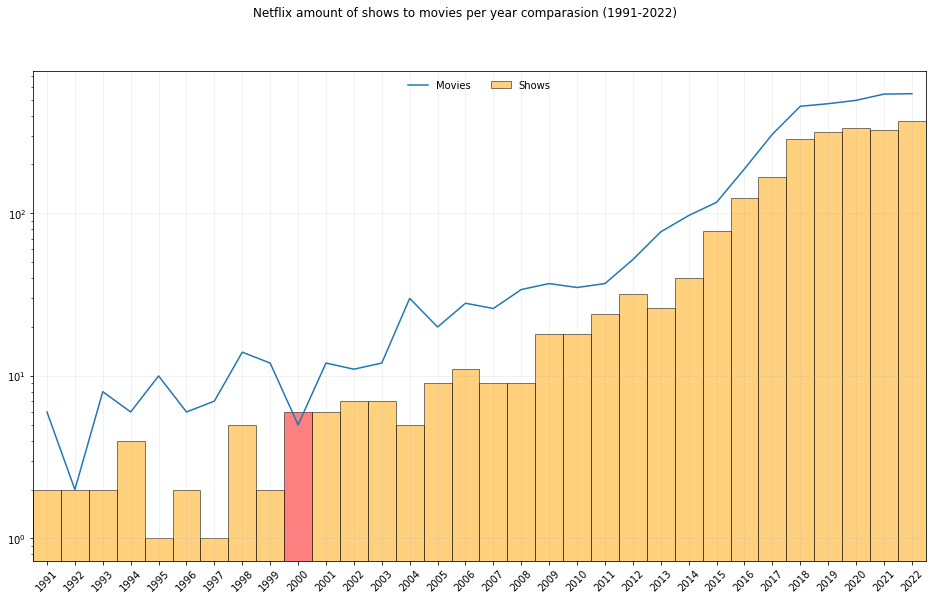

In [168]:
#plot


fig = plt.figure(figsize=[16, 9])
fig.suptitle("Netflix amount of shows to movies per year comparasion (1991-2022)")
ax1 = fig.add_subplot()

#get colors
colors = ["red" if df_show_count.iloc[i]["count"] > df_movie_count.iloc[i]["count"] else "orange" for i in range(df_movie_count.shape[0])]

ax1.bar(df_show_count.index, df_show_count["count"], width=1, edgecolor="black", color=colors, alpha=0.5, label="Shows")
ax1.plot(df_movie_count.index, df_movie_count["count"], label="Movies")
ax1.margins(x=0)
ax1.set_xticks(df_show_count.index)

plt.grid(alpha=0.2)

#rotate xticks
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
    
ax1.set_yscale("log")

ax1.legend(frameon=False, loc='upper center', ncol=3)
